# Lab 6: Group Activity 1
> Group members: Kalen Goo, Alyssa Liu, Brandon Lin, Mayur Shivakumar, Arun Prasad Srinivasan Manoharan, Adam C. Perlin, John Waidhofer, Snehith Jonnaikode

**Example: Train a perceptron for data that is not linearly separable.**
- Based on EDA assignemnt for IRIS dataset, recall the features and classes that were non-linearly separable. 
- Redo the above assignment with a new dataset drawn from IRIS dataset using those features only (Sepal length and sepal width) and versicolor and verginica class labels. 
- Compute the sum of errors, and mean squared error and draw the graph of each with respect to the epochs. ##

### You must remember to do the following tasks
1. Shuffling & train/test split
2. Normalize (mean zero, unit variance)
3. Display the  graph of mse vs epoch





In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

class Perceptron:
    """
    Perceptron neuron
    """

    def __init__(self):
        """
        instantiate a new Perceptron
        
        """
        
        self._b = 0.0  # y-intercept
        self._w = None  # weights assigned to input features
        # count of errors during each iteration
        self.misclassified_samples = []

    def fit(self, x: np.array, y: np.array, epochs=10):
        """
        fit the Perceptron model on the training data

        :param x: samples to fit the model on
        :param y: labels of the training samples
        :param n_iter: number of training iterations 
        """
        self._b = 0.0
        self._w = np.zeros(x.shape[1])
        self.misclassified_samples = []
        mse=0
        for _ in range(epochs):
            # counter of the errors during this training iteration
            errors = 0
            i = np.arange(len(x))
            np.random.shuffle(i)
            for xi, yi in zip(x[i], y[i]):
                # for each sample compute the update value
                update =  (yi - self.predict(xi))
                # and apply it to the y-intercept and weights array
                self._b += update
                self._w += update * xi
                errors += int(update != 0.0)
                            

            self.misclassified_samples.append(errors)
            

    def f(self, x: np.array) -> float:
        """
        compute the output of the neuron
        :param x: input features
        :return: the output of the neuron
        """
        return np.dot(x, self._w) + self._b

    def predict(self, x: np.array):
        """
        convert the output of the neuron to a binary output
        :param x: input features
        :return: 1 if the output for the sample is positive (or zero),
        -1 otherwise
        """
        return np.where(self.f(x) >= 0, 1, 0)

In [4]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
# download and convert the csv into a DataFrame
df = pd.read_csv(url, header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


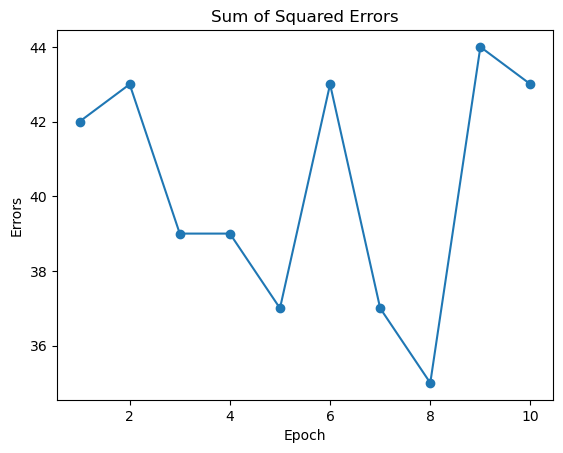

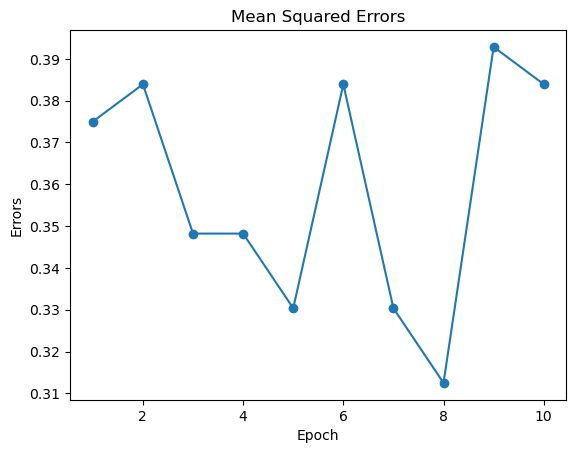

In [5]:
from sklearn.model_selection import train_test_split
data = df[df.iloc[:, 4] != "Iris-setosa"]
x = df.iloc[:,0:2]
y = df.iloc[:, 4]
y = y == "Iris-versicolor"
# Normalize data
x[0] = (x[0] - x[0].mean()) / x[0].std()
x[1] = (x[1] - x[1].mean()) / x[1].std()

x = np.array(x)

y = np.array(y, dtype=np.int64)


# split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,
                                                    random_state=0, shuffle=True)

# train the model
classifier = Perceptron()
classifier.fit(x_train, y_train)

sse = classifier.misclassified_samples
mse = np.array(classifier.misclassified_samples) / len(x_train)


# plot the number of errors during each iteration
plt.plot(np.arange(len(classifier.misclassified_samples)) + 1,
         sse, marker='o')
plt.title("Sum of Squared Errors")
plt.xlabel('Epoch')
plt.ylabel('Errors')
plt.show()

plt.plot(np.arange(len(classifier.misclassified_samples)) + 1,
         mse, marker='o')
plt.title("Mean Squared Errors")
plt.xlabel('Epoch')
plt.ylabel('Errors')
plt.show()
